# Sprint  09 Tasca 01 : Practicant amb training i test sets

### Objectives
- Preprocesament
- Transformació
- Dummy Variable
- Train i Test

### Sources
- https://www.bts.gov/explore-topics-and-geography/topics/airline-time-performance-and-causes-flight-delays

- https://www.flightdeckfriend.com/ask-a-pilot/how-fast-do-commercial-aeroplanes-fly

- https://www.nerdwallet.com/article/travel/fastest-airplanes-commercial-passengers-can-fly



# - Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
___

**Libraries**

In [1]:
# Yolo!
import warnings
warnings.filterwarnings('ignore')

# Scientific and Data Manipulation Libraries :
import scipy
import numpy as np
from scipy.stats import shapiro

# Visualization Libraries :

import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# for Box-Cox Transformation
from scipy import stats

# ML Libraries :
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


# Import Data 
data = pd.read_pickle("./Data_Vols.pkl") 

# set seed for reproducibility
#np.random.seed(45)

**Methods**

In [2]:
def check_distribution(df):
    
# This method takes a dataframe then prints the number of columns 
# and aks the user for the PlotGrid dimensions(NxN).
# Returns a Multiplot Histogram of each variable in a NxN Grid.
    
    # Inputs
    variables = df.columns
    print(f'Number of variables = {len(variables)}')
    n_rows = int(input('Desired Num of rows: '))
    n_cols = int(input('Desired Num of columns: '))
    
    #Plot
    sb.set(font_scale=1.2) 
    fig=plt.figure(figsize=(12,12))
    fig.patch.set_facecolor('slategrey')
    fig.suptitle('DISTRIBUTION OF VARIABLES')
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name, size=14)
        #ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    #Aesthetics
    fig.tight_layout()
    sb.set()
    plt.show()
    plt.close('all')

def check_plot(series):
# This sub-method takes a series of the main dataframe and plots  
# detailed histogram with Kernel density Line
    sb.set()
    b = sb.displot(data=series, 
                   kind='hist', 
                   kde=True,
                   height=2.5, 
                   aspect=2)
    plt.show(b)
    plt.close('all')
    
    
def check_data(df):  
# This method takes a dataframe, then splits variables based on 
# it's Dtype(categorical,numerical,...), then prints a resume 
# and plots an histogram for each one 
        
    def check_qqplot(series):
    # This sub-method takes a series then takes samples wich are 
    # divided into groups called Quantiles.Each Data point in the 
    # sample is correlated with a similar member from the distribution
    # at the same cumulative distribution and plots a graphic
    # showing it.
        sb.set()
        fig = qqplot(series.sample(n=200), line = 'q')
        fig.set_size_inches(5,2.5)
        plt.show(fig) 
        plt.close('all')

    # Select variables by type
    numerical_data = df.select_dtypes(include=['float64', 'int64'])
    categorical_data = df.select_dtypes(include=['object']) 
    boolean_data = df.select_dtypes(include=['bool']) 
    datetime_data = df.select_dtypes(include=['datetime64'])
    
    if len(numerical_data.index) != 0:
        
        # Show resume and plot        
        print(f'NUMERICAL:\n')
        for x in numerical_data.columns: 
            print(f'''\n--------------------------------------\n
                        Attribute:  -{x}- 
                A - Missing values: {df[x].isna().sum()} | Zeros: {list(df[x]).count(0)}
                B - Range: From {df[x].min():.2f} to {df[x].max():.2f} 
                C - Mean: {df[x].mean():.2f} | Median: {df[x].median():.2f} | Mode: {df[x].mode().to_string(index=False)} | Std: {df[x].std():.2f}\n''')
            check_plot(numerical_data[x]) 
            check_qqplot(numerical_data[x])
                    
    if len(categorical_data.index) != 0:
        
        # Show resume and plot
        print(f'\nCATEGORICAL:\n')   
        for x in categorical_data.columns:
            print(f'''\n--------------------------------------\n
                        Attribute:  -{x}- 
                A - Missing values: {df[x].isna().sum()} 
                B - 2_random_picks: {(df[x].sample().to_string(index=False))} and {(df[x].sample().to_string(index=False))}
                C - Most frequent: {df[x].mode().to_string(index=False)}\n''')
            check_plot(df[x])
           
    if len(boolean_data.index) != 0:
        print(f'\nBOOLEAN:\n')   
        for x in boolean_data.columns:
            print(f'''\n--------------------------------------\n
                        Attribute:  -{x}- 
                A - Missing values: {df[x].isna().sum()} 
                B - 2_random_picks: {(df[x].sample().to_string(index=False))} and {(df[x].sample().to_string(index=False))}
                C - Most frequent: {df[x].mode().to_string(index=False)}\n''')
            check_plot(df[x]) 
                        
    if len(datetime_data.index) != 0:
        print(f'\nDATETIME:\n')   
        for x in datetime_data.columns: 
            print(f'''\n--------------------------------------\n
                        Attribute:  -{x}- 
                A - Missing values: {df[x].isna().sum()} 
                B - 2_random_picks: {(df[x].sample().to_string(index=False))} and {(df[x].sample().to_string(index=False))}
                C - Most frequent: {df[x].mode().to_string(index=False)}\n''')
            check_plot(df[x])
            print('\n--------------------------------------\n')
                    

In [3]:
# Dataset info: 
display(data.info())
display(data.describe().round(decimals=2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   AirTime            float64
 5   ArrDelay           float64
 6   DepDelay           float64
 7   CarrierDelay       float64
 8   WeatherDelay       float64
 9   NASDelay           float64
 10  SecurityDelay      float64
 11  LateAircraftDelay  float64
 12  UniqueCarrier      object 
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  Diverted           int64  
 17  Cancelled          int64  
 18  CancellationCode   object 
dtypes: float64(8), int64(7), object(4)
memory usage: 280.7+ MB


None

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Distance,Diverted,Cancelled
count,1936758.0,1936758.00,1936758.00,1936758.00,1928371.00,1928371.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1936758.00,1936758.00,1936758.00
mean,2008.0,6.11,15.75,3.98,108.28,42.20,43.19,19.18,3.70,15.02,0.09,25.30,765.69,0.00,0.00
std,0.0,3.48,8.78,2.00,68.64,56.78,53.40,43.55,21.49,33.83,2.02,42.05,574.48,0.06,0.02
min,2008.0,1.00,1.00,1.00,0.00,-109.00,6.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,58.00,9.00,12.00,0.00,0.00,0.00,0.00,0.00,338.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,90.00,24.00,24.00,2.00,0.00,2.00,0.00,8.00,606.00,0.00,0.00
75%,2008.0,9.00,23.00,6.00,137.00,56.00,53.00,21.00,0.00,15.00,0.00,33.00,998.00,0.00,0.00
max,2008.0,12.00,31.00,7.00,1091.00,2461.00,2467.00,2436.00,1352.00,1357.00,392.00,1316.00,4962.00,1.00,1.00


In [4]:
display(data[data.isna().any(axis=1)])
print(data.isna().sum())

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode
0,2008,1,3,4,116.0,-14.0,8.0,NaN,NaN,NaN,NaN,NaN,WN,IAD,TPA,810,0,0,N
1,2008,1,3,4,113.0,2.0,19.0,NaN,NaN,NaN,NaN,NaN,WN,IAD,TPA,810,0,0,N
2,2008,1,3,4,76.0,14.0,8.0,NaN,NaN,NaN,NaN,NaN,WN,IND,BWI,515,0,0,N
4,2008,1,3,4,87.0,11.0,25.0,NaN,NaN,NaN,NaN,NaN,WN,IND,JAX,688,0,0,N
6,2008,1,3,4,106.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,WN,IND,MCO,828,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936739,2008,12,13,6,91.0,3.0,15.0,NaN,NaN,NaN,NaN,NaN,DL,MCI,ATL,692,0,0,N
1936740,2008,12,13,6,238.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,DL,PDX,ATL,2172,0,0,N
1936750,2008,12,13,6,88.0,-1.0,9.0,NaN,NaN,NaN,NaN,NaN,DL,MCI,ATL,692,0,0,N
1936756,2008,12,13,6,89.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,DL,IAD,ATL,533,0,0,N


Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
AirTime                8387
ArrDelay               8387
DepDelay                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
UniqueCarrier             0
Origin                    0
Dest                      0
Distance                  0
Diverted                  0
Cancelled                 0
CancellationCode          0
dtype: int64



# Data


Number of variables = 19
Desired Num of rows: 4
Desired Num of columns: 5


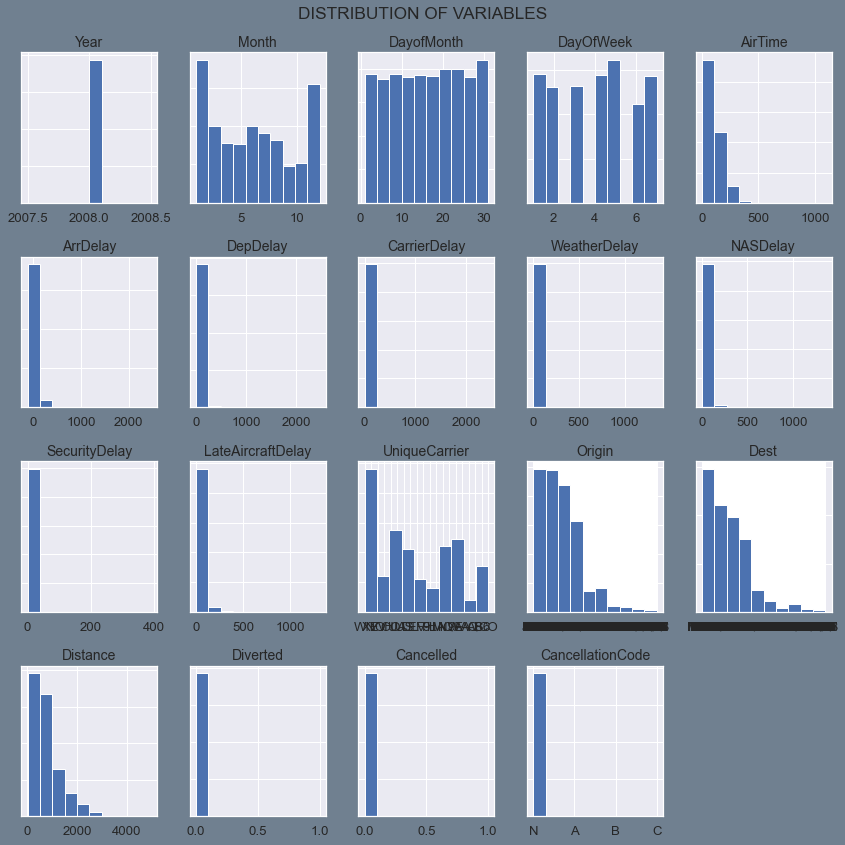

In [5]:
# Check Distribution Grid.
data_distribution = check_distribution(data)

NUMERICAL:


--------------------------------------

                        Attribute:  -Year- 
                A - Missing values: 0 | Zeros: 0
                B - Range: From 2008.00 to 2008.00 
                C - Mean: 2008.00 | Median: 2008.00 | Mode: 2008 | Std: 0.00



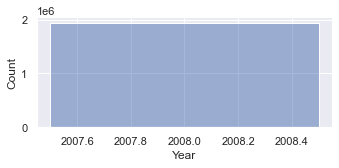

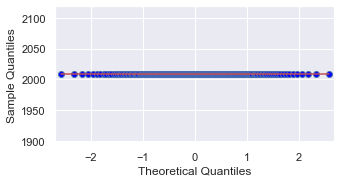


--------------------------------------

                        Attribute:  -Month- 
                A - Missing values: 0 | Zeros: 0
                B - Range: From 1.00 to 12.00 
                C - Mean: 6.11 | Median: 6.00 | Mode: 12 | Std: 3.48



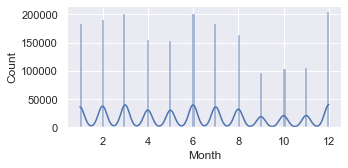

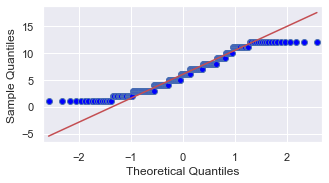


--------------------------------------

                        Attribute:  -DayofMonth- 
                A - Missing values: 0 | Zeros: 0
                B - Range: From 1.00 to 31.00 
                C - Mean: 15.75 | Median: 16.00 | Mode: 22 | Std: 8.78



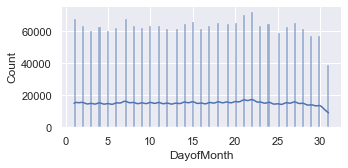

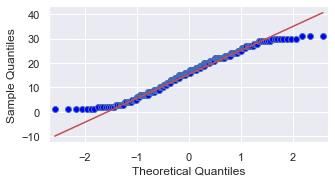


--------------------------------------

                        Attribute:  -DayOfWeek- 
                A - Missing values: 0 | Zeros: 0
                B - Range: From 1.00 to 7.00 
                C - Mean: 3.98 | Median: 4.00 | Mode: 5 | Std: 2.00



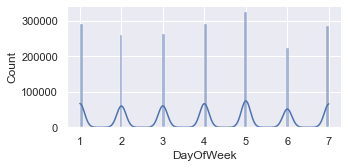

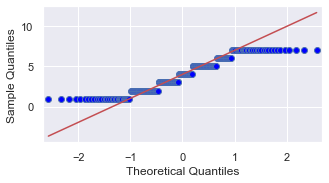


--------------------------------------

                        Attribute:  -AirTime- 
                A - Missing values: 8387 | Zeros: 7
                B - Range: From 0.00 to 1091.00 
                C - Mean: 108.28 | Median: 90.00 | Mode: 45.0 | Std: 68.64



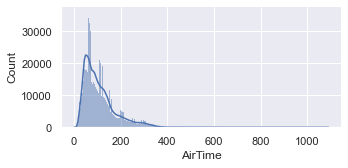

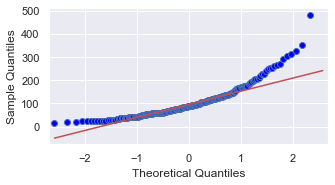


--------------------------------------

                        Attribute:  -ArrDelay- 
                A - Missing values: 8387 | Zeros: 27040
                B - Range: From -109.00 to 2461.00 
                C - Mean: 42.20 | Median: 24.00 | Mode: 10.0 | Std: 56.78



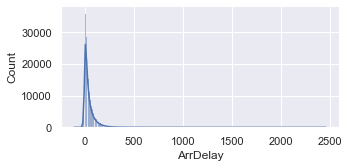

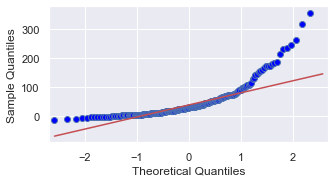


--------------------------------------

                        Attribute:  -DepDelay- 
                A - Missing values: 0 | Zeros: 0
                B - Range: From 6.00 to 2467.00 
                C - Mean: 43.19 | Median: 24.00 | Mode: 6.0 | Std: 53.40



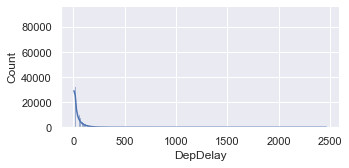

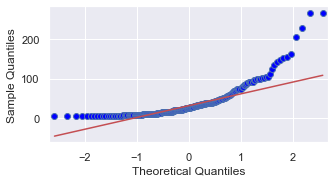


--------------------------------------

                        Attribute:  -CarrierDelay- 
                A - Missing values: 689270 | Zeros: 591049
                B - Range: From 0.00 to 2436.00 
                C - Mean: 19.18 | Median: 2.00 | Mode: 0.0 | Std: 43.55



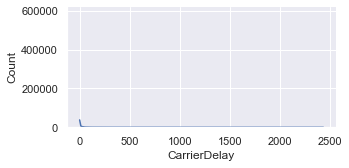

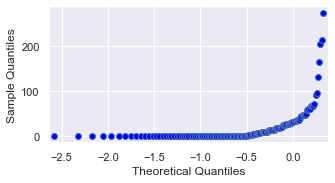


--------------------------------------

                        Attribute:  -WeatherDelay- 
                A - Missing values: 689270 | Zeros: 1148570
                B - Range: From 0.00 to 1352.00 
                C - Mean: 3.70 | Median: 0.00 | Mode: 0.0 | Std: 21.49



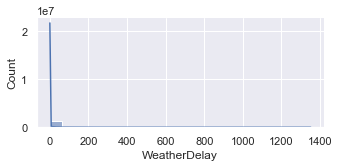

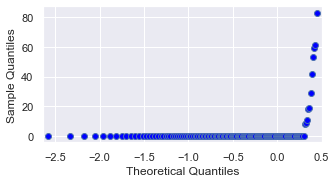


--------------------------------------

                        Attribute:  -NASDelay- 
                A - Missing values: 689270 | Zeros: 588995
                B - Range: From 0.00 to 1357.00 
                C - Mean: 15.02 | Median: 2.00 | Mode: 0.0 | Std: 33.83



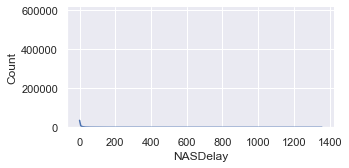

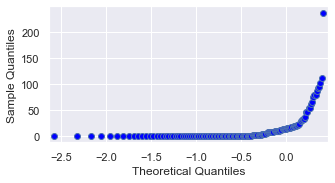


--------------------------------------

                        Attribute:  -SecurityDelay- 
                A - Missing values: 689270 | Zeros: 1241483
                B - Range: From 0.00 to 392.00 
                C - Mean: 0.09 | Median: 0.00 | Mode: 0.0 | Std: 2.02



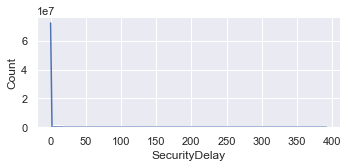

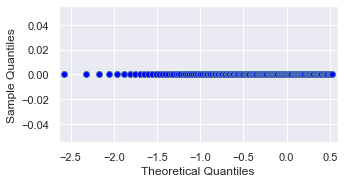


--------------------------------------

                        Attribute:  -LateAircraftDelay- 
                A - Missing values: 689270 | Zeros: 555906
                B - Range: From 0.00 to 1316.00 
                C - Mean: 25.30 | Median: 8.00 | Mode: 0.0 | Std: 42.05



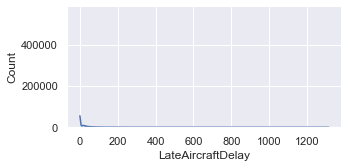

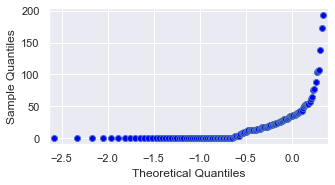


--------------------------------------

                        Attribute:  -Distance- 
                A - Missing values: 0 | Zeros: 0
                B - Range: From 11.00 to 4962.00 
                C - Mean: 765.69 | Median: 606.00 | Mode: 337 | Std: 574.48



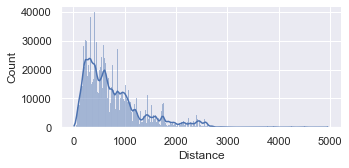

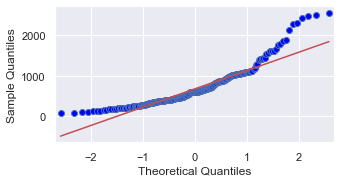


--------------------------------------

                        Attribute:  -Diverted- 
                A - Missing values: 0 | Zeros: 1929004
                B - Range: From 0.00 to 1.00 
                C - Mean: 0.00 | Median: 0.00 | Mode: 0 | Std: 0.06



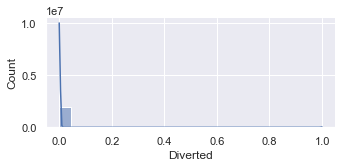

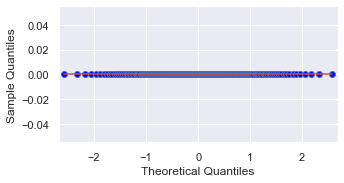


--------------------------------------

                        Attribute:  -Cancelled- 
                A - Missing values: 0 | Zeros: 1936125
                B - Range: From 0.00 to 1.00 
                C - Mean: 0.00 | Median: 0.00 | Mode: 0 | Std: 0.02



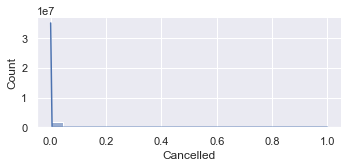

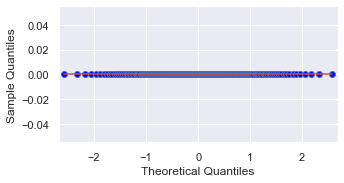


CATEGORICAL:


--------------------------------------

                        Attribute:  -UniqueCarrier- 
                A - Missing values: 0 
                B - 2_random_picks: WN and UA
                C - Most frequent: WN



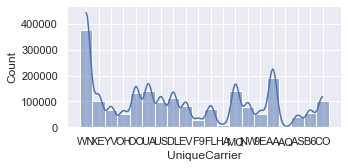


--------------------------------------

                        Attribute:  -Origin- 
                A - Missing values: 0 
                B - 2_random_picks: SFO and DAL
                C - Most frequent: ATL



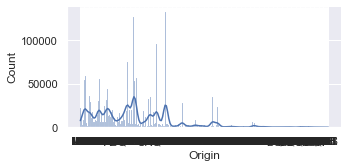


--------------------------------------

                        Attribute:  -Dest- 
                A - Missing values: 0 
                B - 2_random_picks: SAT and SDF
                C - Most frequent: ORD



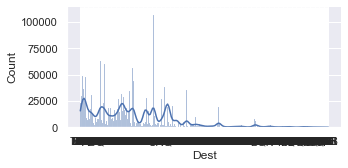


--------------------------------------

                        Attribute:  -CancellationCode- 
                A - Missing values: 0 
                B - 2_random_picks: N and N
                C - Most frequent: N



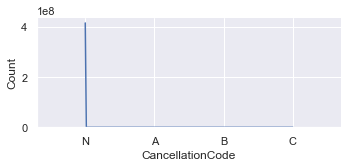


BOOLEAN:


DATETIME:



In [6]:
# Check Data Individually by type.
check_data(data)

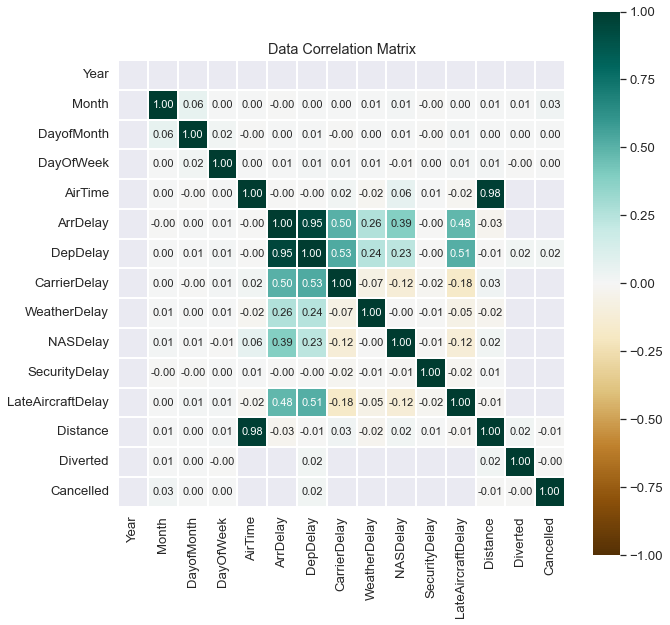

In [7]:
# Check correlation between variables
data_corr = data.corr()

# set style and plot:
sb.set(font_scale=1.2) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sb.heatmap(data = data_corr, 
               square = True,
               annot = True,
               cmap = 'BrBG',
               vmin = -1,
               vmax = 1,
               center = 0, 
               linewidths=2,
               ax=ax, 
               annot_kws={"size":11}, fmt='.2f')
            
ax.set(title='Data Correlation Matrix')
plt.show()
plt.close()

# - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

## Handling missing values

Prior to any data transformation, I'd like to address missing data points
in order to prioritize data conservation (so far...)

In [8]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in all columns
display(missing_values_count[:])

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
AirTime                8387
ArrDelay               8387
DepDelay                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
UniqueCarrier             0
Origin                    0
Dest                      0
Distance                  0
Diverted                  0
Cancelled                 0
CancellationCode          0
dtype: int64

- We can easily spot two clusters of Nan values:
    - The first related to the type of delay (carrier, weather, Nas or security) with 689.270 Missing values each variable.    
    - The second related to Airtime and Arrival delay with 8.387 Missing values each variable.
    
    
- Since they share values, we'll be fine just cheking one variable per cluster.

#### First nan cluster

In [9]:
# Peek at first variable
display(data.loc[data['CarrierDelay'].isna()])

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode
0,2008,1,3,4,116.0,-14.0,8.0,NaN,NaN,NaN,NaN,NaN,WN,IAD,TPA,810,0,0,N
1,2008,1,3,4,113.0,2.0,19.0,NaN,NaN,NaN,NaN,NaN,WN,IAD,TPA,810,0,0,N
2,2008,1,3,4,76.0,14.0,8.0,NaN,NaN,NaN,NaN,NaN,WN,IND,BWI,515,0,0,N
4,2008,1,3,4,87.0,11.0,25.0,NaN,NaN,NaN,NaN,NaN,WN,IND,JAX,688,0,0,N
6,2008,1,3,4,106.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,WN,IND,MCO,828,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936739,2008,12,13,6,91.0,3.0,15.0,NaN,NaN,NaN,NaN,NaN,DL,MCI,ATL,692,0,0,N
1936740,2008,12,13,6,238.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,DL,PDX,ATL,2172,0,0,N
1936750,2008,12,13,6,88.0,-1.0,9.0,NaN,NaN,NaN,NaN,NaN,DL,MCI,ATL,692,0,0,N
1936756,2008,12,13,6,89.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,DL,IAD,ATL,533,0,0,N


- Since all the missing values are the same within this type of delays, we can assume the aprox. 689k NaN's might as well be justified because less than 15 min of "delay" is considered "on-time" (as stated in the following excerpt from the official Bureau of Transportations website.) therefore none of this delay causes applies.  

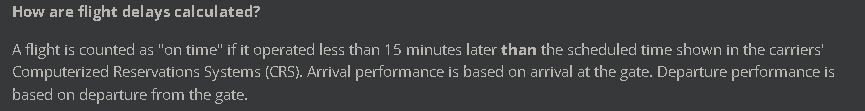

- So in any case the value they would add could be 0 instead of Nan. Thus we can replace all the NaN's with 0's.

#### Second Nan Cluster

In [10]:
#Check for missing values 
display(data.loc[data['AirTime'].isna()])

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode
1280,2008,1,3,4,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,WN,SAN,SMF,480,1,0,N
1372,2008,1,3,4,NaN,NaN,265.0,NaN,NaN,NaN,NaN,NaN,WN,SFO,SAN,447,1,0,N
1776,2008,1,4,5,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,WN,BOI,RNO,335,1,0,N
1831,2008,1,4,5,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,WN,BUR,SMF,358,1,0,N
2244,2008,1,4,5,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,WN,LAS,RNO,345,1,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935651,2008,12,10,3,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,DL,ATL,BUF,712,0,1,A
1935716,2008,12,11,4,NaN,NaN,169.0,NaN,NaN,NaN,NaN,NaN,DL,LAX,JFK,2475,1,0,N
1935876,2008,12,11,4,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,DL,ATL,JFK,760,0,1,A
1935978,2008,12,11,4,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,DL,IAD,ATL,533,1,0,N


In [11]:
# Check for flight times lasting 0 minutes
display(data.loc[data['AirTime'] < 1])

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode
53543,2008,1,5,6,0.0,118.0,98.0,0.0,0.0,0.0,0.0,118.0,OO,SGU,SLC,269,0,0,N
54342,2008,1,6,7,0.0,104.0,67.0,0.0,104.0,0.0,0.0,0.0,OO,TWF,SLC,175,0,0,N
245633,2008,2,12,2,0.0,183.0,177.0,0.0,0.0,183.0,0.0,0.0,OO,ASE,ORD,1013,0,0,N
414132,2008,3,31,1,0.0,24.0,10.0,0.0,0.0,24.0,0.0,0.0,XE,MSY,MCI,690,0,0,N
441835,2008,3,18,2,0.0,97.0,108.0,0.0,0.0,97.0,0.0,0.0,OO,ASE,ORD,1013,0,0,N
782761,2008,5,21,3,0.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,OO,LAX,SAN,109,0,0,N
784702,2008,5,27,2,0.0,-2.0,15.0,NaN,NaN,NaN,NaN,NaN,OO,SAN,LAX,109,0,0,N


In [12]:
# Check for flight times lasting less than 20 minutes
display(data.loc[data['AirTime'] < 20])

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode
25563,2008,1,27,7,12.0,-48.0,7.0,NaN,NaN,NaN,NaN,NaN,WN,MCI,MDW,405,0,0,N
32929,2008,1,5,6,3.0,158.0,175.0,0.0,3.0,0.0,0.0,155.0,XE,SFO,LAX,337,0,0,N
34051,2008,1,31,4,16.0,77.0,83.0,0.0,14.0,0.0,0.0,63.0,XE,IAH,BPT,79,0,0,N
36763,2008,1,14,1,14.0,32.0,50.0,32.0,0.0,0.0,0.0,0.0,XE,IAH,BPT,79,0,0,N
37694,2008,1,11,5,16.0,2.0,16.0,NaN,NaN,NaN,NaN,NaN,XE,IAH,BPT,79,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914098,2008,12,24,3,9.0,36.0,39.0,0.0,0.0,0.0,0.0,36.0,AS,WRG,PSG,31,0,0,N
1914155,2008,12,24,3,10.0,3.0,13.0,NaN,NaN,NaN,NaN,NaN,AS,PSG,WRG,31,0,0,N
1914853,2008,12,29,1,15.0,168.0,169.0,0.0,52.0,0.0,0.0,116.0,AS,WRG,PSG,31,0,0,N
1915098,2008,12,30,2,13.0,75.0,76.0,0.0,75.0,0.0,0.0,0.0,AS,WRG,PSG,31,0,0,N


- The 8.387 NaN's Relatives to AirTime and Arrival Delay, begs for a different approach since most of them appear to be linked with cancelled or diverted flights (hence the nonmarked cells in the Correlation-Matrix-Graphics from the initial Exercici_1).
    - Although if we check accurately we can spot some irregular data (e.g., 7 Non-cancelled/diverted flights with 0.0 airtime ) 

- Since the number of nans in airtime category is 8387 we may check if the number of cancelled + diverted flights is the same.

In [13]:
display(data.loc[(data['Diverted'] | data['Cancelled']) == 1])

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode
1280,2008,1,3,4,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,WN,SAN,SMF,480,1,0,N
1372,2008,1,3,4,NaN,NaN,265.0,NaN,NaN,NaN,NaN,NaN,WN,SFO,SAN,447,1,0,N
1776,2008,1,4,5,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,WN,BOI,RNO,335,1,0,N
1831,2008,1,4,5,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,WN,BUR,SMF,358,1,0,N
2244,2008,1,4,5,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,WN,LAS,RNO,345,1,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935651,2008,12,10,3,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,DL,ATL,BUF,712,0,1,A
1935716,2008,12,11,4,NaN,NaN,169.0,NaN,NaN,NaN,NaN,NaN,DL,LAX,JFK,2475,1,0,N
1935876,2008,12,11,4,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,DL,ATL,JFK,760,0,1,A
1935978,2008,12,11,4,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,DL,IAD,ATL,533,1,0,N


- Indeed, the values are the same, so it makes sense that a cancelled/diverted flight doesn't have the actual attributes of an average flight (e.g., AirTime) we could then replace Nans for 0's as well, as long as there are no any other zeros in airtime, right?
    - Well, as we can see from above, there is 7 flights with 0 minutes Airtime. Not a big deal to get rid-of, but 7000 flights with time less than 20 min it's another thing. 
    - ¿Could it be, then, that some AirTimes don't make any sense? We could just get a new column called speed, dividing distance by Airtime and see if averaged velocity is within acceptable flight speed ranges (i.e, Between take-off speed and the speed of sound(in the presonic phase). For acceptable ranges we mean realistic average passengers flight speed wich might be between 150 (for single engine flights )to around 700 mph (for big planes).

In [14]:
#Create new column
data['AvgSpeed'] = data['Distance'] / (data['AirTime']/60)
display(data.loc[data['AvgSpeed'] > 700])
display(data.loc[data['AvgSpeed'] < 150])


,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode,AvgSpeed
25563,2008,1,27,7,12.0,-48.0,7.0,NaN,NaN,NaN,NaN,NaN,WN,MCI,MDW,405,0,0,N,2025.000000
31151,2008,1,16,3,53.0,-19.0,31.0,NaN,NaN,NaN,NaN,NaN,XE,GEG,SMF,649,0,0,N,734.716981
32929,2008,1,5,6,3.0,158.0,175.0,0.0,3.0,0.0,0.0,155.0,XE,SFO,LAX,337,0,0,N,6740.000000
42954,2008,1,10,4,31.0,43.0,63.0,0.0,0.0,0.0,0.0,43.0,YV,IAD,MYR,372,0,0,N,720.000000
45609,2008,1,24,4,7.0,4.0,17.0,NaN,NaN,NaN,NaN,NaN,YV,ORD,SBN,84,0,0,N,720.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692621,2008,11,13,4,58.0,45.0,51.0,0.0,0.0,0.0,0.0,45.0,FL,HOU,ATL,696,0,0,N,720.000000
1711983,2008,11,13,4,88.0,11.0,12.0,NaN,NaN,NaN,NaN,NaN,AA,MIA,SJU,1045,0,0,N,712.500000
1790490,2008,12,16,2,13.0,-5.0,10.0,NaN,NaN,NaN,NaN,NaN,OH,ATL,TYS,152,0,0,N,701.538462
1792857,2008,12,27,6,10.0,42.0,70.0,42.0,0.0,0.0,0.0,0.0,OH,HTS,CVG,123,0,0,N,738.000000


,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode,AvgSpeed
6890,2008,1,7,1,117.0,132.0,14.0,0.0,13.0,118.0,0.0,1.0,WN,CMH,MDW,284,0,0,N,145.641026
7022,2008,1,7,1,75.0,382.0,313.0,0.0,233.0,69.0,0.0,80.0,WN,IND,MDW,162,0,0,N,129.600000
33897,2008,1,2,3,65.0,245.0,240.0,0.0,0.0,35.0,0.0,210.0,XE,PVD,EWR,160,0,0,N,147.692308
34577,2008,1,10,4,38.0,134.0,103.0,0.0,103.0,31.0,0.0,0.0,XE,CLL,IAH,74,0,0,N,116.842105
34815,2008,1,2,3,47.0,29.0,14.0,0.0,0.0,29.0,0.0,0.0,XE,BDL,EWR,116,0,0,N,148.085106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928662,2008,12,15,1,94.0,82.0,52.0,0.0,0.0,82.0,0.0,0.0,CO,BOS,EWR,200,0,0,N,127.659574
1930498,2008,12,9,2,106.0,62.0,33.0,0.0,0.0,62.0,0.0,0.0,CO,BOS,EWR,200,0,0,N,113.207547
1930499,2008,12,9,2,95.0,92.0,68.0,0.0,0.0,92.0,0.0,0.0,CO,BOS,EWR,200,0,0,N,126.315789
1933822,2008,12,4,4,86.0,42.0,7.0,7.0,0.0,35.0,0.0,0.0,DL,BOS,LGA,185,0,0,N,129.069767


In [15]:
# Drop values out of our scale
data.drop(data[data['AvgSpeed'] < 150].index, inplace = True)
data.drop(data[data['AvgSpeed'] > 700].index, inplace = True)

In [16]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f'''
Missing {percent_missing:.2f} % of the total.
Missing {total_missing} cells of total {total_cells} cells''')


Missing 8.96 % of the total.
Missing 3463124 cells of total 38668120 cells


In [17]:
# replace all NA's(except Airtime ) with 0
nonans = data.fillna(value=0, axis=0)
#check it
clean = nonans.isna().sum()
clean

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
AirTime              0
ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
Diverted             0
Cancelled            0
CancellationCode     0
AvgSpeed             0
dtype: int64

In [18]:
display(nonans.describe(include='all').round(decimals=2))

#Change name for the sake of clarity
clean_df = nonans

,Year,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,Origin,Dest,Distance,Diverted,Cancelled,CancellationCode,AvgSpeed
count,1933406.0,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406.00,1933406,1933406,1933406,1933406.00,1933406.00,1933406.00,1933406,1933406.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,303,304,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,ATL,ORD,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377489,131551,108542,NaN,NaN,NaN,1932773,NaN
mean,2008.0,6.11,15.75,3.98,107.90,41.93,43.15,12.35,2.37,9.61,0.06,16.29,NaN,NaN,NaN,766.75,0.00,0.00,NaN,395.44
std,0.0,3.48,8.78,2.00,68.87,56.63,53.36,36.10,17.29,27.93,1.62,35.85,NaN,NaN,NaN,574.36,0.06,0.02,NaN,79.34
min,2008.0,1.00,1.00,1.00,0.00,-70.00,6.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,30.00,0.00,0.00,NaN,0.00
25%,2008.0,3.00,8.00,2.00,58.00,9.00,12.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,340.00,0.00,0.00,NaN,351.30
50%,2008.0,6.00,16.00,4.00,90.00,24.00,24.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,607.00,0.00,0.00,NaN,403.64
75%,2008.0,9.00,23.00,6.00,137.00,55.00,53.00,10.00,0.00,6.00,0.00,18.00,NaN,NaN,NaN,998.00,0.00,0.00,NaN,447.97


>NaNs already replaced with zeroes, so no NAN's beyond this point. Now let's pick a categorical variable ('UniqueCarrier') and make dummy variables

## Dummy

In [19]:
# Define & check dummy.
dummy = pd.get_dummies(clean_df['UniqueCarrier'])
# Convert numpy array to pandas Dataframe
dummy = pd.DataFrame(dummy, columns=dummy.columns)
dummy

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936754,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936755,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
clean_df.drop(columns=['UniqueCarrier', 'Year'],axis=1, inplace=True)

In [21]:
clean_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'AirTime', 'ArrDelay', 'DepDelay',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Origin', 'Dest', 'Distance', 'Diverted',
       'Cancelled', 'CancellationCode', 'AvgSpeed'],
      dtype='object')

## Standarize Numericals (Scaling)

In [22]:
# Select numerical variables.
num = clean_df.select_dtypes(include=['float64', 'int64'])
#exclude boolean diverted, cancelled
bol = num.loc[:, ~num.columns.isin(['Diverted', 'Cancelled'])]

In [31]:
# Apply Robust scaler
scaler = RobustScaler().fit(num)
scaled_data = scaler.transform(num)
scaled_data = pd.DataFrame(scaled_data, columns=num.columns)

#Check Scaled data
scaled_data

%store scaled_data


Stored 'scaled_data' (DataFrame)


In [24]:
def check_methods(df, x):

    scaler = RobustScaler().fit(df)
    robust_df = scaler.transform(df)  
    robust_df = pd.DataFrame(robust_df, columns =df.columns)

    scaler = preprocessing.StandardScaler()
    standard_df = scaler.fit_transform(df)
    standard_df = pd.DataFrame(standard_df, columns =df.columns)

    log_df = np.log(df[x])
    log_df = pd.DataFrame(log_df, columns =df.columns)
    
    sb.set()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(15, 3))
    ax1.set_title('Before Scaling')
    sb.kdeplot(data=df[x], ax = ax1, color ='r')
    ax2.set_title('After Robust Scaling')
    sb.kdeplot(data=robust_df[x], ax = ax2, color ='r')
    ax3.set_title('After Standard Scaling')
    sb.kdeplot(data=standard_df[x], ax = ax3, color ='r')
    ax4.set_title('After Logaritmic transformation')
    sb.kdeplot(data=log_df[x], ax = ax4, color ='r')
    plt.show()
    plt.close()

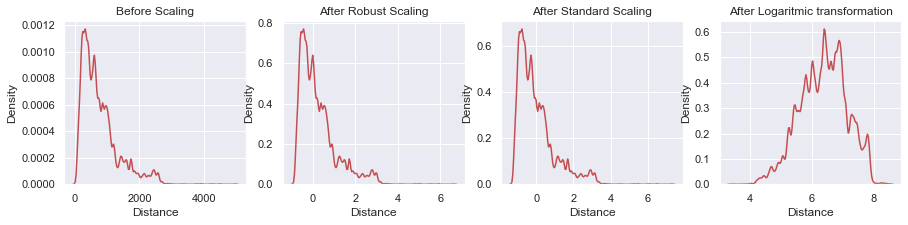

In [25]:
check_methods(num, 'Distance')

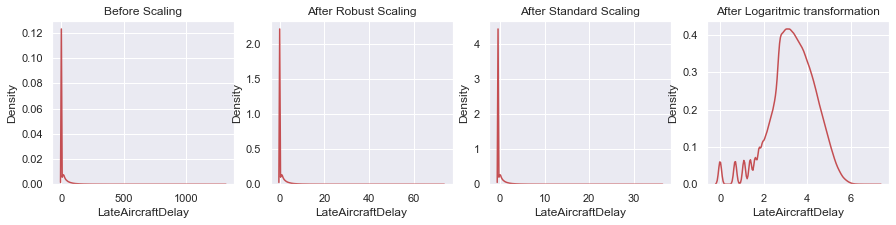

In [26]:
check_methods(num, 'LateAircraftDelay')

## - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

Number of variables = 15
Desired Num of rows: 4
Desired Num of columns: 5


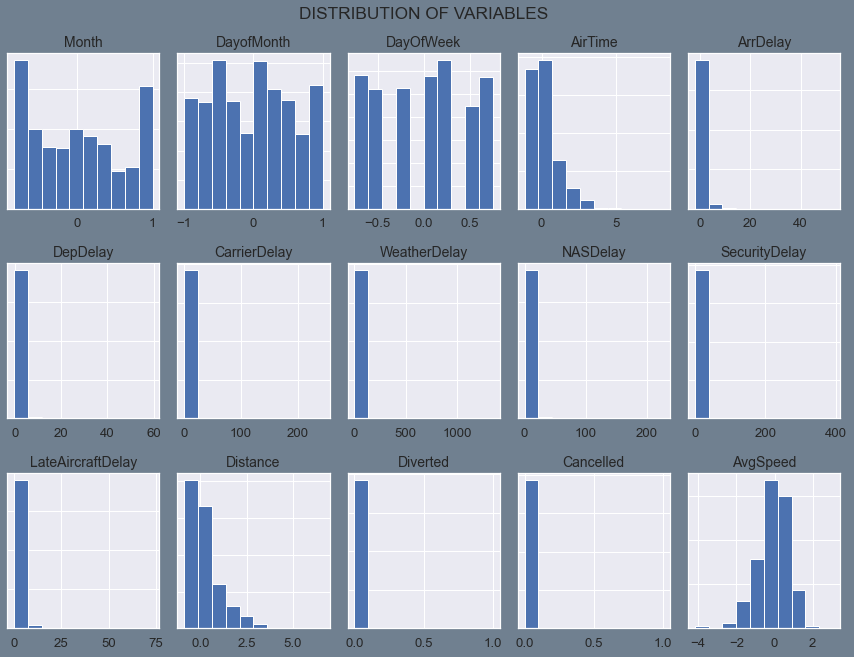

In [27]:
check_distribution(scaled_data)

NUMERICAL:


--------------------------------------

                        Attribute:  -Month- 
                A - Missing values: 0 | Zeros: 200589
                B - Range: From -0.83 to 1.00 
                C - Mean: 0.02 | Median: 0.00 | Mode: 1.0 | Std: 0.58



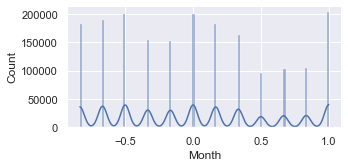

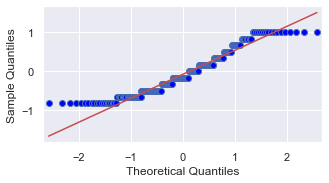


--------------------------------------

                        Attribute:  -DayofMonth- 
                A - Missing values: 0 | Zeros: 61074
                B - Range: From -1.00 to 1.00 
                C - Mean: -0.02 | Median: 0.00 | Mode: 0.4 | Std: 0.59



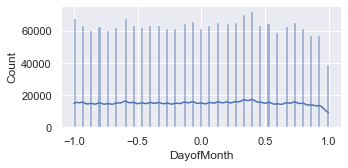

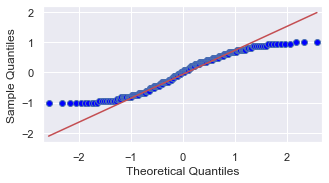


--------------------------------------

                        Attribute:  -DayOfWeek- 
                A - Missing values: 0 | Zeros: 288971
                B - Range: From -0.75 to 0.75 
                C - Mean: -0.00 | Median: 0.00 | Mode: 0.25 | Std: 0.50



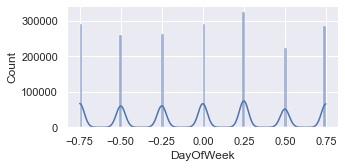

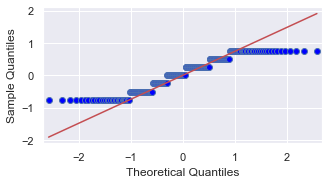


--------------------------------------

                        Attribute:  -AirTime- 
                A - Missing values: 0 | Zeros: 13328
                B - Range: From -1.14 to 8.14 
                C - Mean: 0.23 | Median: 0.00 | Mode: -0.56962 | Std: 0.87



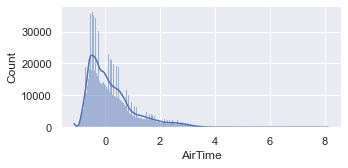

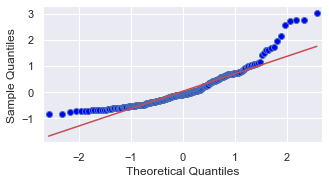


--------------------------------------

                        Attribute:  -ArrDelay- 
                A - Missing values: 0 | Zeros: 24572
                B - Range: From -2.04 to 52.98 
                C - Mean: 0.39 | Median: 0.00 | Mode: -0.304348 | Std: 1.23



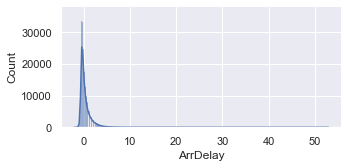

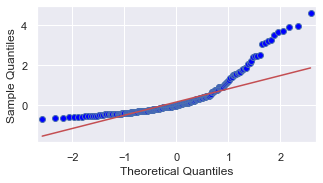


--------------------------------------

                        Attribute:  -DepDelay- 
                A - Missing values: 0 | Zeros: 27593
                B - Range: From -0.44 to 59.59 
                C - Mean: 0.47 | Median: 0.00 | Mode: -0.439024 | Std: 1.30



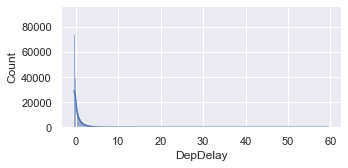

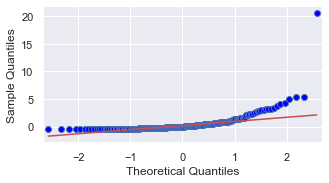


--------------------------------------

                        Attribute:  -CarrierDelay- 
                A - Missing values: 0 | Zeros: 1277898
                B - Range: From 0.00 to 243.60 
                C - Mean: 1.23 | Median: 0.00 | Mode: 0.0 | Std: 3.61



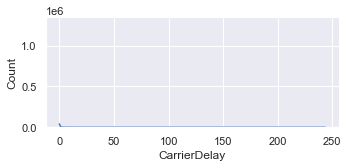

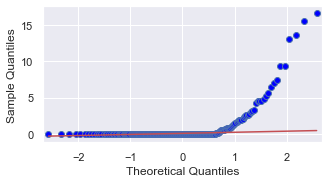


--------------------------------------

                        Attribute:  -WeatherDelay- 
                A - Missing values: 0 | Zeros: 1834951
                B - Range: From 0.00 to 1352.00 
                C - Mean: 2.37 | Median: 0.00 | Mode: 0.0 | Std: 17.29



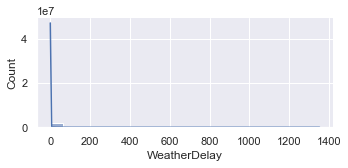

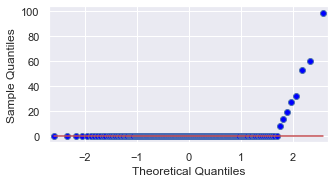


--------------------------------------

                        Attribute:  -NASDelay- 
                A - Missing values: 0 | Zeros: 1277339
                B - Range: From 0.00 to 226.17 
                C - Mean: 1.60 | Median: 0.00 | Mode: 0.0 | Std: 4.65



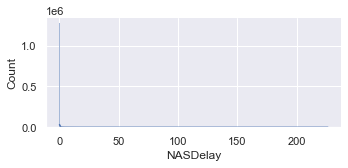

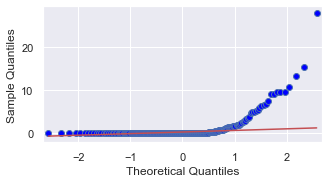


--------------------------------------

                        Attribute:  -SecurityDelay- 
                A - Missing values: 0 | Zeros: 1927409
                B - Range: From 0.00 to 392.00 
                C - Mean: 0.06 | Median: 0.00 | Mode: 0.0 | Std: 1.62



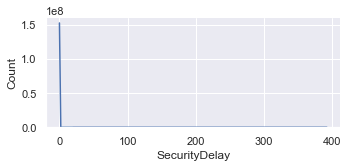

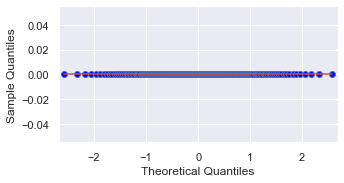


--------------------------------------

                        Attribute:  -LateAircraftDelay- 
                A - Missing values: 0 | Zeros: 1242983
                B - Range: From 0.00 to 73.11 
                C - Mean: 0.91 | Median: 0.00 | Mode: 0.0 | Std: 1.99



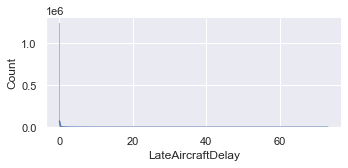

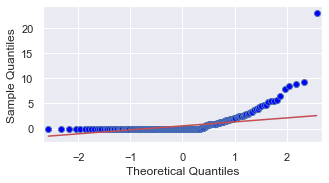


--------------------------------------

                        Attribute:  -Distance- 
                A - Missing values: 0 | Zeros: 1582
                B - Range: From -0.88 to 6.62 
                C - Mean: 0.24 | Median: 0.00 | Mode: -0.410334 | Std: 0.87



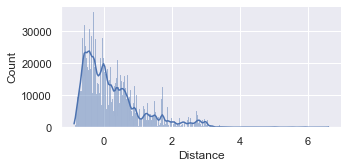

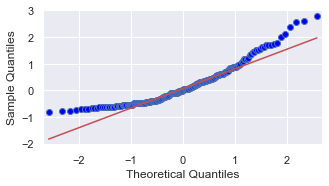


--------------------------------------

                        Attribute:  -Diverted- 
                A - Missing values: 0 | Zeros: 1925652
                B - Range: From 0.00 to 1.00 
                C - Mean: 0.00 | Median: 0.00 | Mode: 0.0 | Std: 0.06



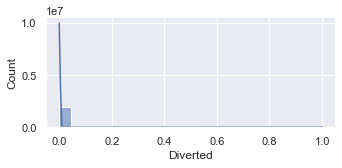

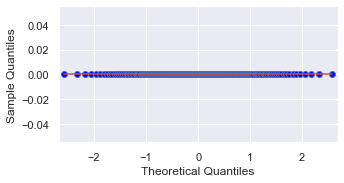


--------------------------------------

                        Attribute:  -Cancelled- 
                A - Missing values: 0 | Zeros: 1932773
                B - Range: From 0.00 to 1.00 
                C - Mean: 0.00 | Median: 0.00 | Mode: 0.0 | Std: 0.02



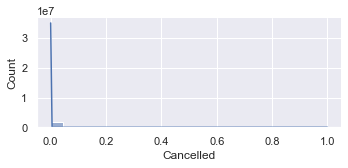

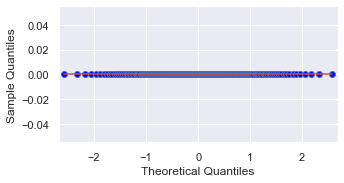


--------------------------------------

                        Attribute:  -AvgSpeed- 
                A - Missing values: 0 | Zeros: 726
                B - Range: From -4.18 to 3.07 
                C - Mean: -0.08 | Median: 0.00 | Mode: -4.175673 | Std: 0.82



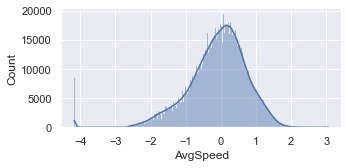

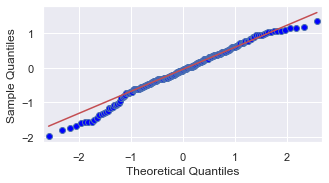


CATEGORICAL:


BOOLEAN:


DATETIME:



In [28]:
check_data(scaled_data)

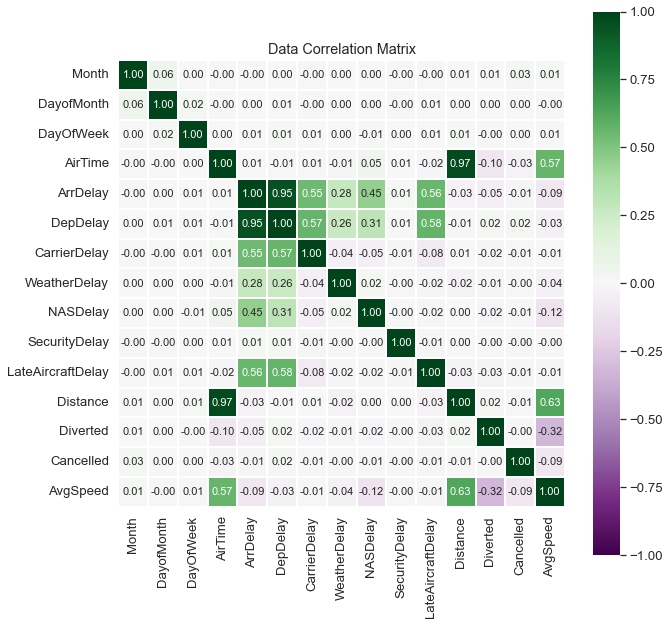

In [29]:
# Check correlation between variables
data_corr = scaled_data.corr()

# set style and plot:
sb.set(font_scale=1.2) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sb.heatmap(data = data_corr, 
               square = True,
               annot = True,
               cmap = 'PRGn',
               vmin = -1,
               vmax = 1,
               center = 0, 
               linewidths=2,
               ax=ax, 
               annot_kws={"size":11}, fmt='.2f')
            
ax.set(title='Data Correlation Matrix')
plt.show()
plt.close()

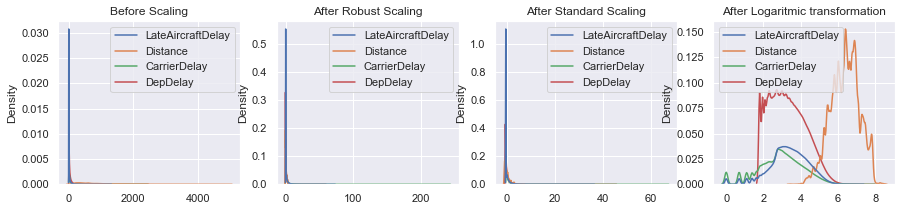

In [30]:

check_methods(num, ['LateAircraftDelay','Distance','CarrierDelay','DepDelay'])